In [4]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries from Scikit Learn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

# Import Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import Customer Data

customer_info = pd.read_excel('/content/drive/MyDrive/Data Science/Practice - ML/Data Sets used/Bank_Churn_Messy.xlsx',sheet_name='Customer_Info')
customer_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [6]:
# Import Account Data

account_info = pd.read_excel('/content/drive/MyDrive/Data Science/Practice - ML/Data Sets used/Bank_Churn_Messy.xlsx',sheet_name='Account_Info')
account_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [7]:
# Checking for Data Types, Information regarding the Customer Info

customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [8]:
# Checking for Data Types, Information regarding the Account Info

account_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [9]:
# Checking for any Duplicates in Customer Info

customer_info.duplicated().sum()

np.int64(1)

In [10]:
# Dropping the Duplicate values

customer_info.drop_duplicates(inplace=True,keep='first')

customer_info.duplicated().sum()

np.int64(0)

In [11]:
# Checking for any Duplicates in Account info

account_info.duplicated().sum()

np.int64(2)

In [12]:
# Dropping the Duplicate values

account_info.drop_duplicates(inplace=True,keep='first')

account_info.duplicated().sum()

np.int64(0)

In [13]:
customer_info.info()
print('***************************************************')
account_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 703.1+ KB
***************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10000 non-null  int64 
 1   Balance         10000 non-null  object
 2   NumOfProducts   10000 non-null  int64 

In [14]:
# Merge Customer and Account Data

data = pd.merge(customer_info,account_info,how='inner',on=['CustomerId','Tenure'])
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [15]:
# Check for Null values

data.isnull().sum()

,0
CustomerId,0
Surname,3
CreditScore,0
Geography,0
Gender,0
Age,3
Tenure,0
EstimatedSalary,0
Balance,0
NumOfProducts,0


In [16]:
# Dropping PII columns

data.drop(columns=['CustomerId','Surname'],inplace=True,axis=1)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [17]:
# Handling Null values

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [18]:
# Checking for Null values

data.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
EstimatedSalary,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


In [19]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
2,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
3,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
4,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [20]:
# Checking for unique values in Categorical Data

for cols in data.select_dtypes(include='object').columns:
  print(f'Unique Values in {cols} with {data[cols].nunique()} are {data[cols].unique()}')

Unique Values in Geography with 5 are ['FRA' 'Spain' 'French' 'France' 'Germany']
Unique Values in Gender with 2 are ['Female' 'Male']
Unique Values in EstimatedSalary with 9997 are ['€101348.88' '€112542.58' '€113931.57' ... '€42085.58' '€92888.52'
 '€38190.78']
Unique Values in Balance with 6382 are ['€0.0' '€83807.86' '€159660.8' ... '€57369.61' '€75075.31' '€130142.79']
Unique Values in HasCrCard with 2 are ['Yes' 'No']
Unique Values in IsActiveMember with 2 are ['Yes' 'No']


In [21]:
# Updating EstimatedSalary and Balance Value

data['EstimatedSalary'] = data['EstimatedSalary'].str.replace('€','')
data['Balance'] = data['Balance'].str.replace('€','')

data['EstimatedSalary']=data['EstimatedSalary'].astype('float64')
data['Balance']=data['Balance'].astype('float64')

data.head()


,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
3,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
4,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [22]:
round(data['Exited'].value_counts(normalize=True)*100,2)

,proportion
Exited,
0,79.63
1,20.37


[<BarContainer object of 2 artists>]


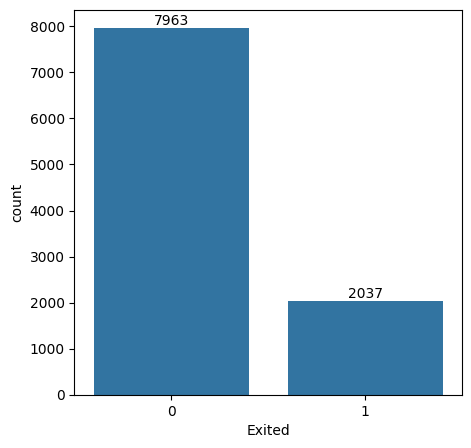

In [50]:
# Analysing Target Variable

plt.figure(figsize=(5,5))
ax=sns.countplot(data=data,x='Exited')
print(ax.containers)
plt.bar_label(ax.containers[0])
plt.show()

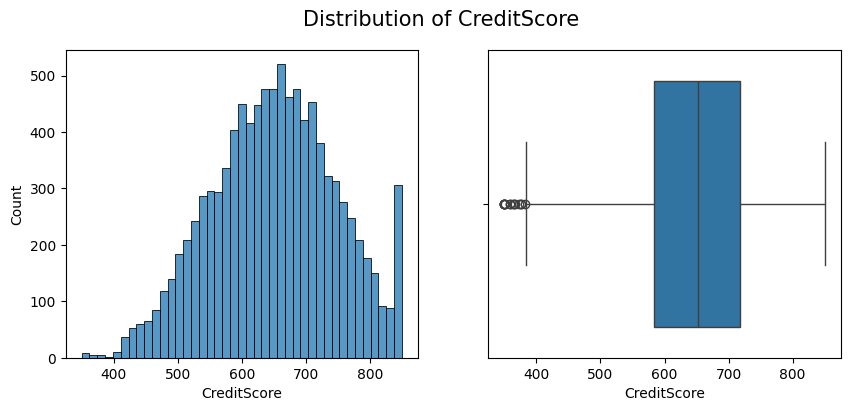

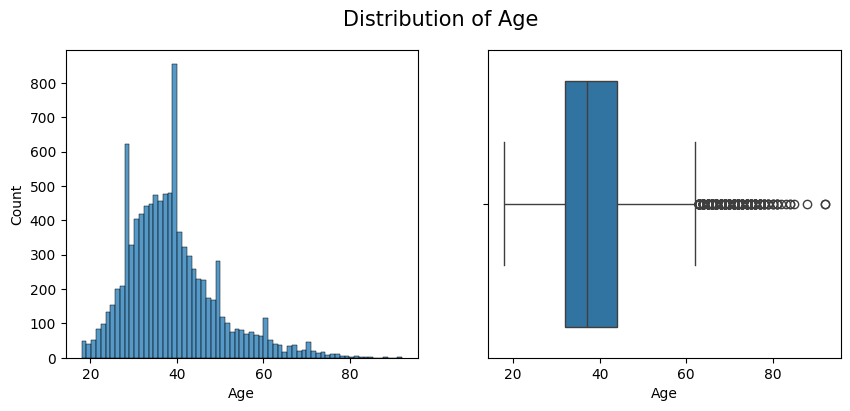

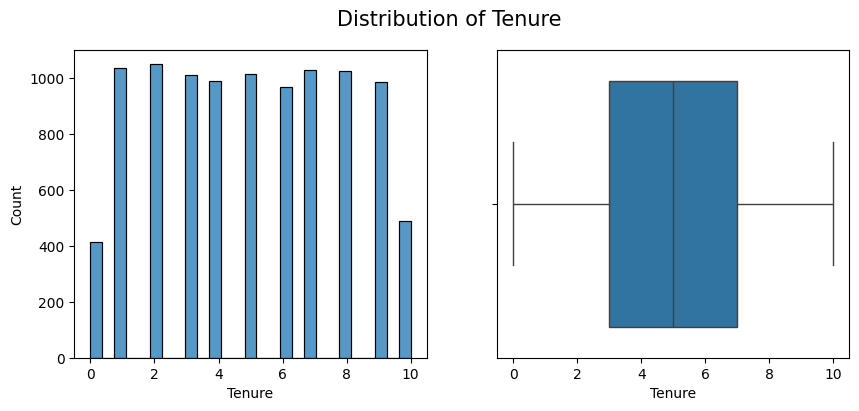

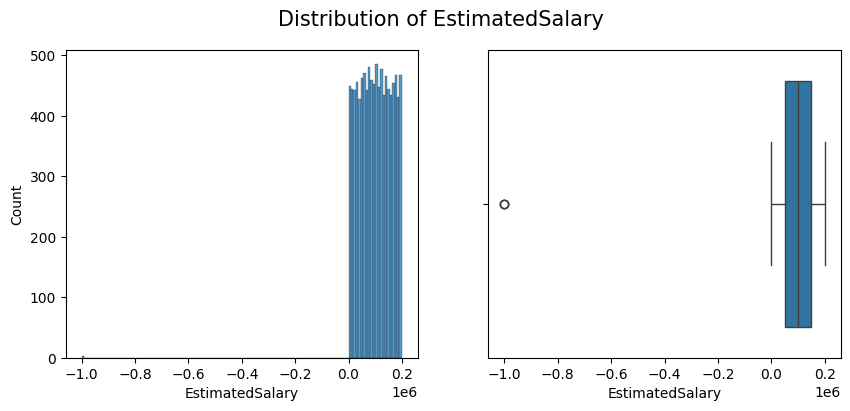

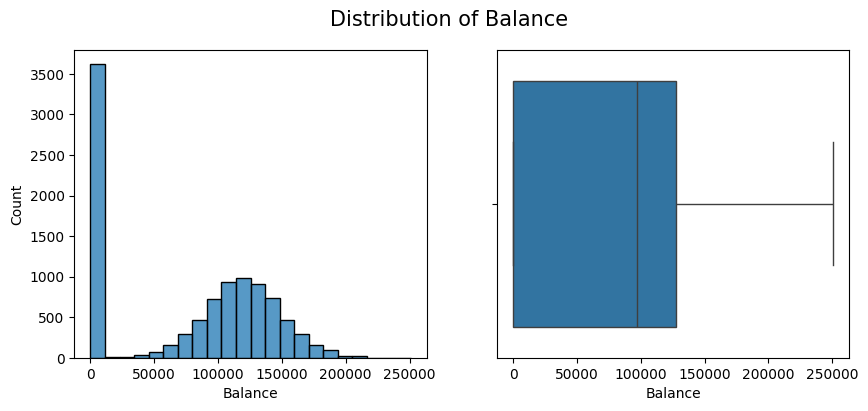

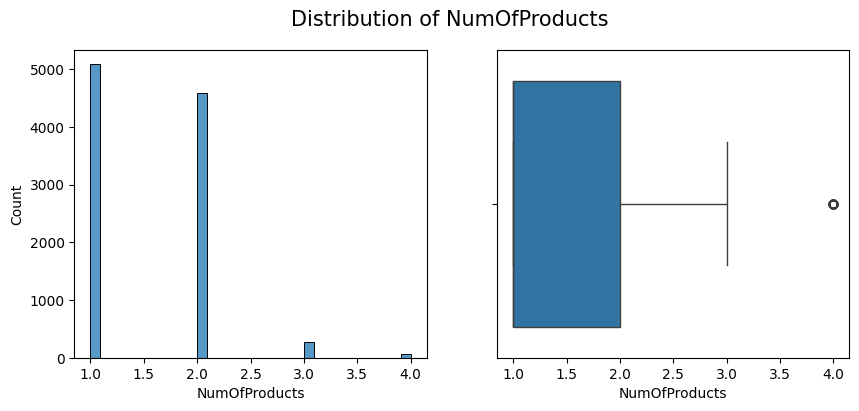

In [24]:
# Numerical Analysis


for cols in data.columns:
  if data[cols].dtype != 'O' and cols !='Exited':
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Distribution of {cols}", fontsize=15)
    plt.subplot(1,2,1)
    sns.histplot(data=data,x=data[cols])
    plt.subplot(1,2,2)
    sns.boxplot(data[cols],orient='h')
    plt.show()


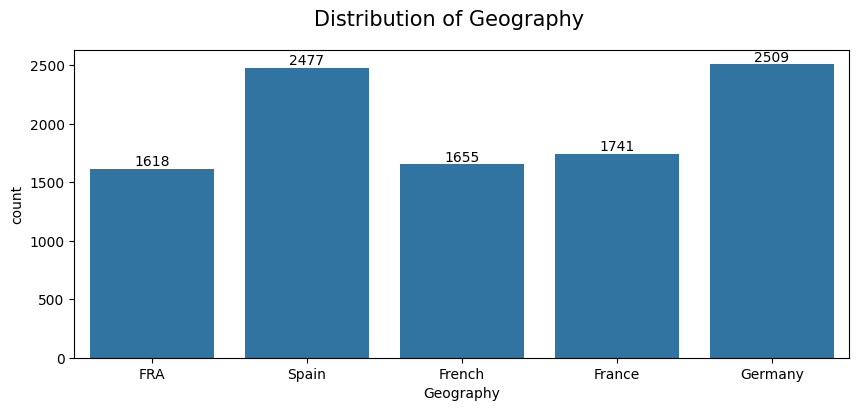

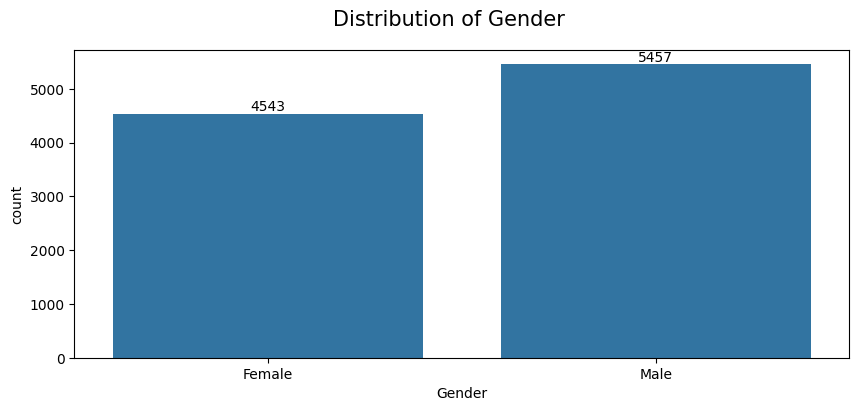

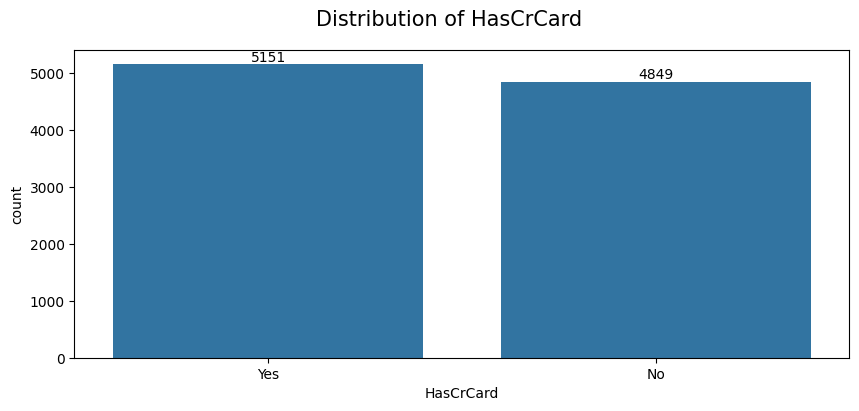

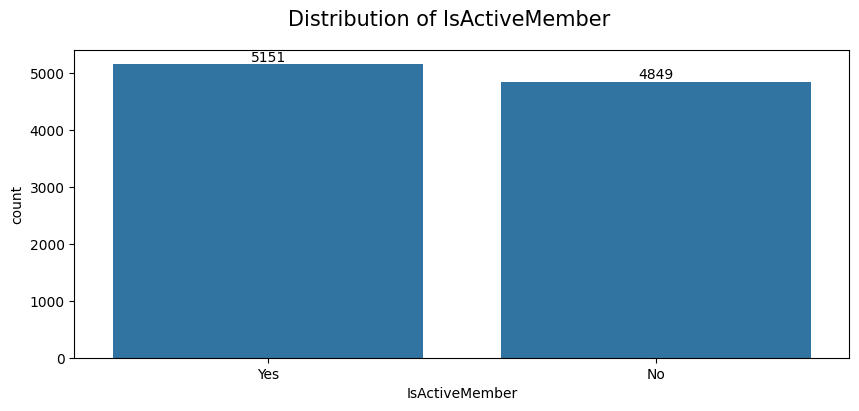

In [25]:

# Categorical Analysis

for cols in data.columns:
  if data[cols].dtype == 'O' :
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Distribution of {cols}", fontsize=15)
    ax=sns.countplot(data=data,x=data[cols])
    plt.bar_label(ax.containers[0])
    plt.show()


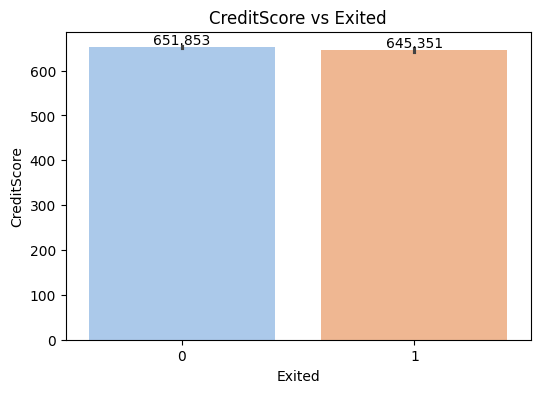

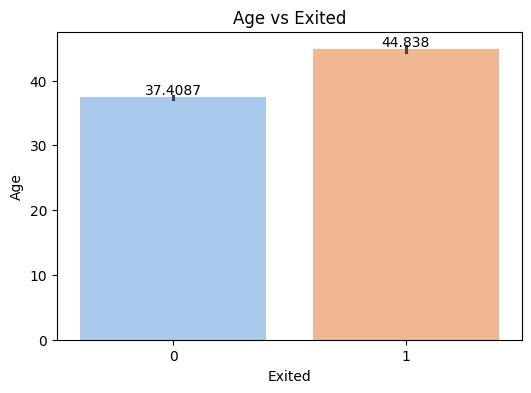

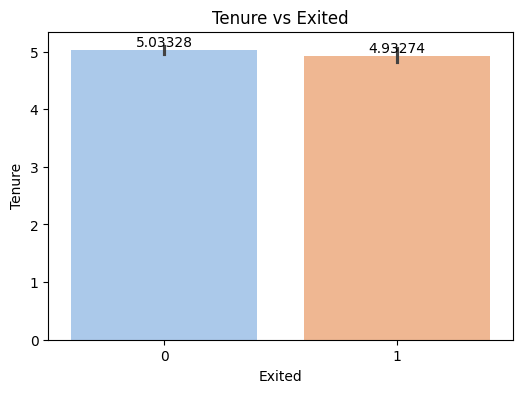

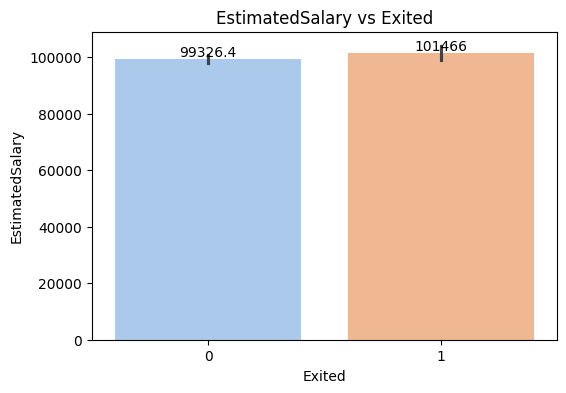

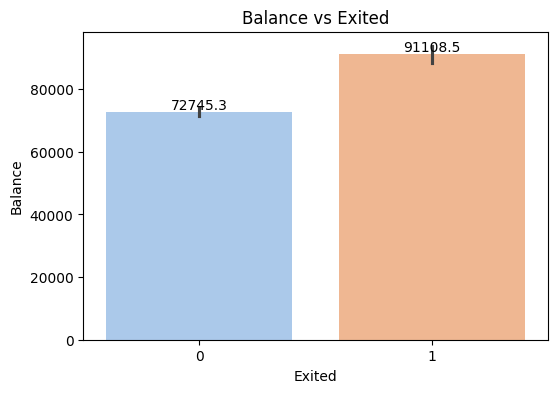

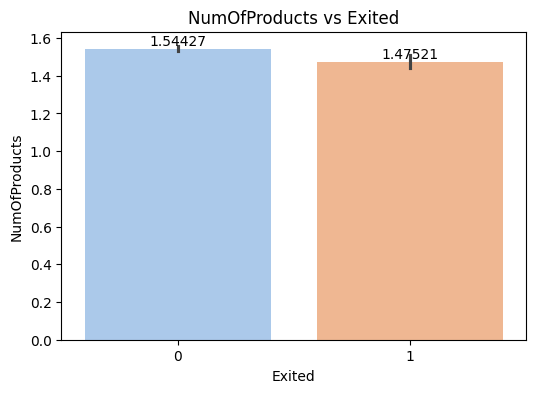

In [26]:
# Comparison with Target variable and Numerical Columns

for cols in data.columns:
  if data[cols].dtype != 'O' and cols!='Exited':
    plt.figure(figsize=(6, 4))
    plt.title(f'{cols} vs Exited')
    ax=sns.barplot(data=data,x='Exited',y=cols, palette='pastel')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.show()

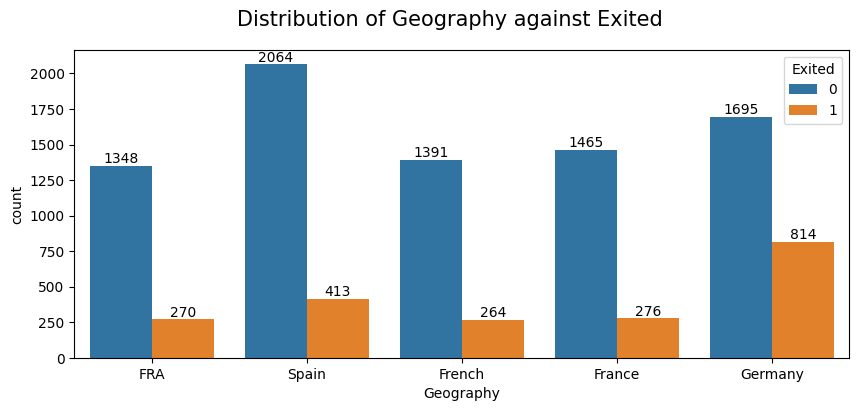

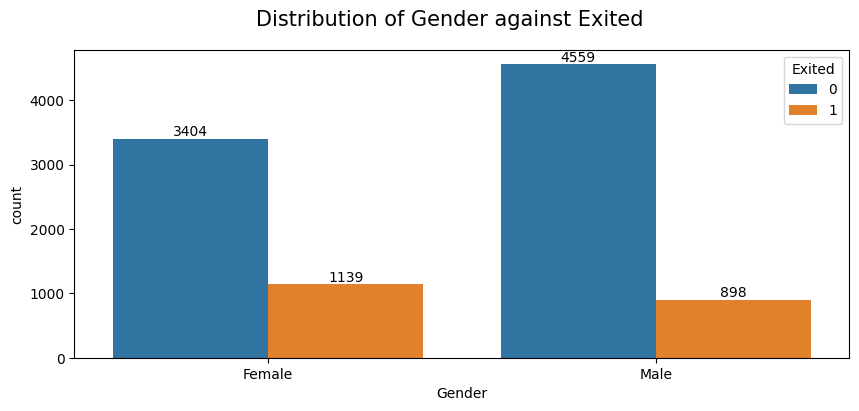

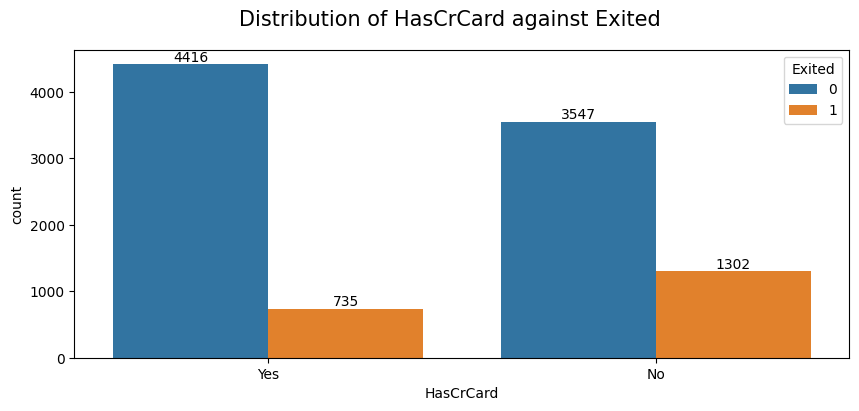

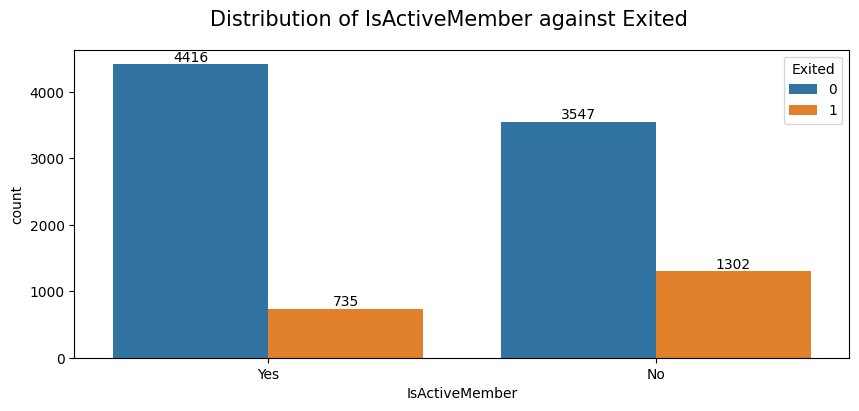

In [27]:
# Comparison with Target variable and Categorical Columns

for cols in data.columns:
  if data[cols].dtype == 'O' :
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Distribution of {cols} against Exited", fontsize=15)
    ax=sns.countplot(data=data,x=data[cols],hue='Exited')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.show()

In [28]:
# Updating Categorical Data with Integer Values

data['Gender'] = data['Gender'].map({'Female':0,'Male':1})
data['HasCrCard'] = data['HasCrCard'].map({'Yes': 1, 'No': 0})
data['IsActiveMember'] = data['IsActiveMember'].map({'Yes': 1, 'No': 0})

data.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,0,42.0,2,101348.88,0.00,1,1,1,1
1,608,Spain,0,41.0,1,112542.58,83807.86,1,1,1,0
2,502,French,0,42.0,8,113931.57,159660.80,3,0,0,1
3,699,FRA,0,39.0,1,93826.63,0.00,2,0,0,0
4,850,Spain,0,43.0,2,79084.10,125510.82,1,1,1,0


In [29]:
# Checking the Data Types

data.dtypes

,0
CreditScore,int64
Geography,object
Gender,int64
Age,float64
Tenure,int64
EstimatedSalary,float64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64


In [30]:
# Use One Hot Encoding to convert Geography categorical data to numerical data

encoded_data = pd.get_dummies(data,drop_first=True,dtype='int')
encoded_data.head()

,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_French,Geography_Germany,Geography_Spain
0,619,0,42.0,2,101348.88,0.00,1,1,1,1,0,0,0,0
1,608,0,41.0,1,112542.58,83807.86,1,1,1,0,0,0,0,1
2,502,0,42.0,8,113931.57,159660.80,3,0,0,1,0,1,0,0
3,699,0,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0
4,850,0,43.0,2,79084.10,125510.82,1,1,1,0,0,0,0,1


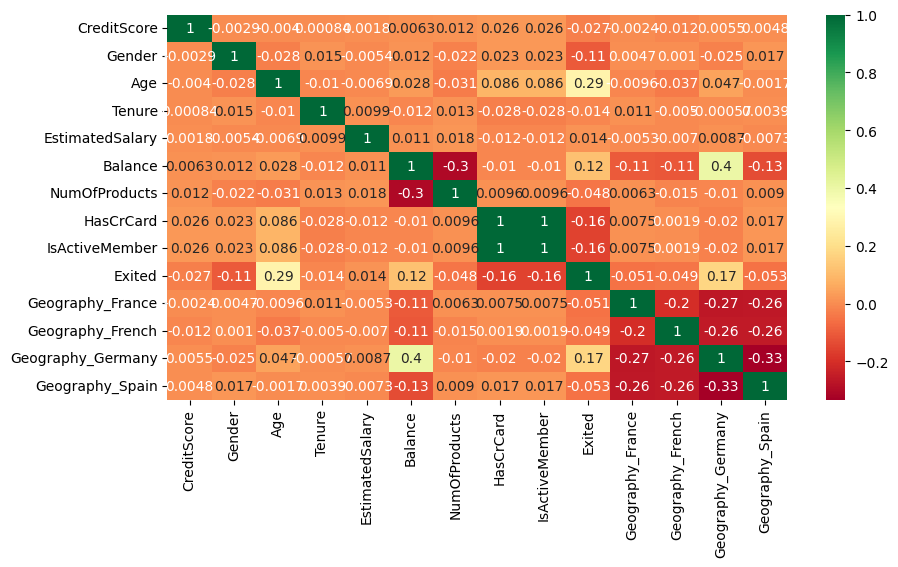

In [31]:
# Multi Collinearity Check

plt.figure(figsize=(10,5))
sns.heatmap(encoded_data.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [32]:
# Train Test Split

x= encoded_data.drop(columns=['Exited'])
y=encoded_data['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [33]:
# Balancing the data - Target variable's proportion

smote=SMOTE(random_state=42)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

x_train_smote.shape,y_train_smote.shape

((12740, 13), (12740,))

In [34]:
x_train_smote.head()

,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_French,Geography_Germany,Geography_Spain
0,753,1,57.0,7,159475.08,0.00,1,0,0,0,1,0,0
1,739,1,32.0,3,63981.37,102128.27,1,0,0,0,0,1,0
2,755,0,37.0,0,117396.25,113865.23,2,1,1,0,0,1,0
3,561,1,37.0,5,83093.25,0.00,2,0,0,0,1,0,0
4,692,1,49.0,6,107472.99,110540.43,2,1,1,0,0,1,0


In [35]:
# Scaling the Data

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [36]:
x_train_scaled.head()

,CreditScore,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_French,Geography_Germany,Geography_Spain
0,1.135396,1.173777,1.572606,0.787428,0.980979,-1.348935,-0.728277,-0.765221,-0.765221,-0.363237,2.813419,-0.580009,-0.463506
1,0.982531,1.173777,-0.905359,-0.680932,-0.611016,0.327477,-0.728277,-0.765221,-0.765221,-0.363237,-0.355439,1.724111,-0.463506
2,1.157234,-0.851950,-0.409766,-1.782201,0.279475,0.520137,1.037663,1.306812,1.306812,-0.363237,-0.355439,1.724111,-0.463506
3,-0.961044,1.173777,-0.409766,0.053248,-0.292398,-1.348935,1.037663,-0.765221,-0.765221,-0.363237,2.813419,-0.580009,-0.463506
4,0.469340,1.173777,0.779657,0.420338,0.114042,0.465561,1.037663,1.306812,1.306812,-0.363237,-0.355439,1.724111,-0.463506


Training Score of Decision Tree : 100.0
Testing Score of Decision Tree : 51.65
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.78      0.55      0.65      1593
           1       0.18      0.37      0.24       407

    accuracy                           0.52      2000
   macro avg       0.48      0.46      0.44      2000
weighted avg       0.65      0.52      0.56      2000



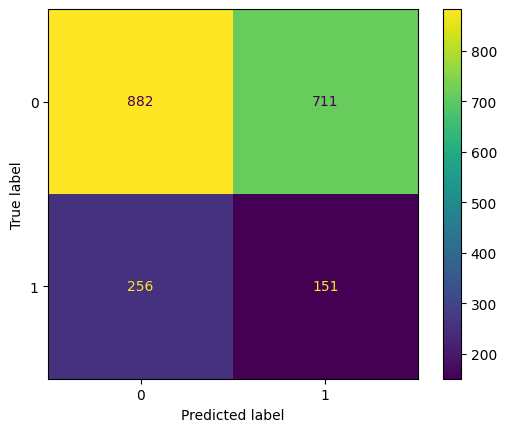

In [37]:
#- Decision Tree

dtree= DecisionTreeClassifier(random_state=42)
dtree.fit(x_train_smote,y_train_smote)
print(f"Training Score of Decision Tree : {round(dtree.score(x_train_smote,y_train_smote)*100,2)}")
y_pred_dtree = dtree.predict(x_test_scaled)
print(f"Testing Score of Decision Tree : {round(accuracy_score(y_test,y_pred_dtree)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_dtree))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtree)

Training Score of Random Forest : 100.0
Testing Score of Random Forest : 81.0
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1593
           1       0.94      0.07      0.13       407

    accuracy                           0.81      2000
   macro avg       0.87      0.53      0.51      2000
weighted avg       0.83      0.81      0.74      2000



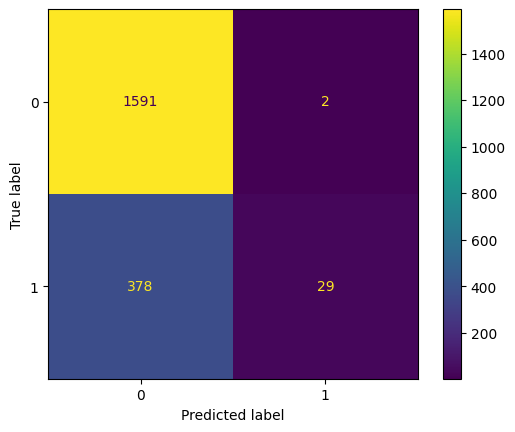

In [38]:
#- Random Forest

rf= RandomForestClassifier(random_state=42)
rf.fit(x_train_smote,y_train_smote)
print(f"Training Score of Random Forest : {round(rf.score(x_train_smote,y_train_smote)*100,2)}")
y_pred_rf = rf.predict(x_test_scaled)
print(f"Testing Score of Random Forest : {round(accuracy_score(y_test,y_pred_rf)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_rf))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)

Training Score of KNN : 88.41
Testing Score of KNN : 78.65
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1593
           1       0.48      0.62      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.81      0.79      0.80      2000



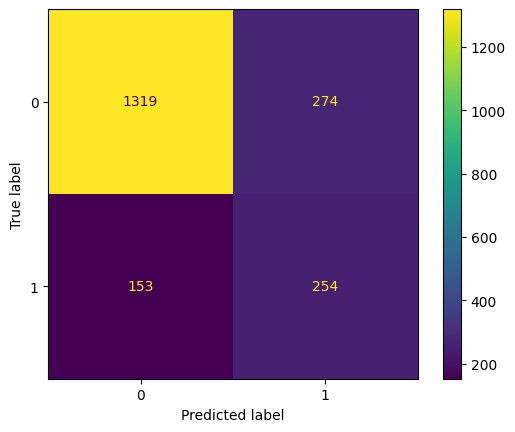

In [39]:
# Training the model - KNN

knn= KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train_scaled,y_train_smote)
print(f"Training Score of KNN : {round(knn.score(x_train_scaled,y_train_smote)*100,2)}")
y_pred_knn = knn.predict(x_test_scaled)
print(f"Testing Score of KNN : {round(accuracy_score(y_test,y_pred_knn)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_knn))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

Training Score of Logistic Regression : 80.54
Testing Score of Logistic Regression : 74.3
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1593
           1       0.40      0.53      0.46       407

    accuracy                           0.74      2000
   macro avg       0.64      0.66      0.64      2000
weighted avg       0.77      0.74      0.76      2000



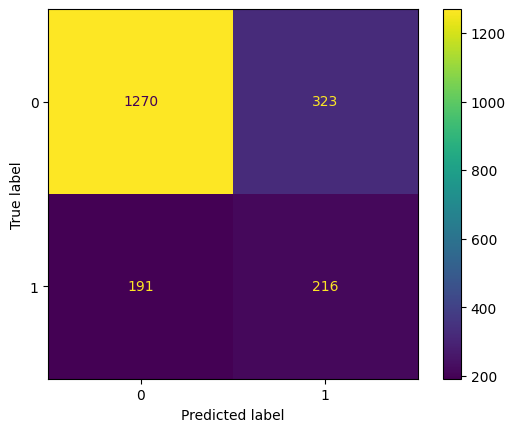

In [40]:
# Training the model - Logistic Regression

log_reg= LogisticRegression(n_jobs=-1)
log_reg.fit(x_train_scaled,y_train_smote)
print(f"Training Score of Logistic Regression : {round(log_reg.score(x_train_scaled,y_train_smote)*100,2)}")
y_pred_log_reg = log_reg.predict(x_test_scaled)
print(f"Testing Score of Logistic Regression : {round(accuracy_score(y_test,y_pred_log_reg)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_log_reg))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log_reg)

In [41]:
# Since KNN has better Performance compared to all other Algorithms, Tuning for the best parameters

knn= KNeighborsClassifier(n_jobs=-1)
param={'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
tuning= GridSearchCV(estimator=knn,param_grid=param,cv=5,verbose=2)
tuning.fit(x_train_scaled,y_train_smote)
best_params=tuning.best_params_
print(f"Best Parameters : {tuning.best_params_}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.9s
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.7s
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.7s
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.6s
[CV] END ....................algorithm=auto, weights=uniform; total time=   0.6s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.4s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.4s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.4s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.4s
[CV] END ...................algorithm=auto, weights=distance; total time=   0.4s
[CV] END ...............algorithm=ball_tree, weights=uniform; total time=   1.1s
[CV] END ...............algorithm=ball_tree, weig

In [42]:
print(f"Best Parameters : {tuning.best_params_}")

Best Parameters : {'algorithm': 'auto', 'weights': 'distance'}


In [43]:
knn.set_params(**best_params)
cv_score = []

for k in range(1,20):
    knn_cv = knn.set_params(n_neighbors=k)
    scores = cross_val_score(knn_cv, x_train_scaled, y_train_smote, scoring='accuracy', n_jobs=-1)
    cv_score.append(scores.mean())

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'distance'}

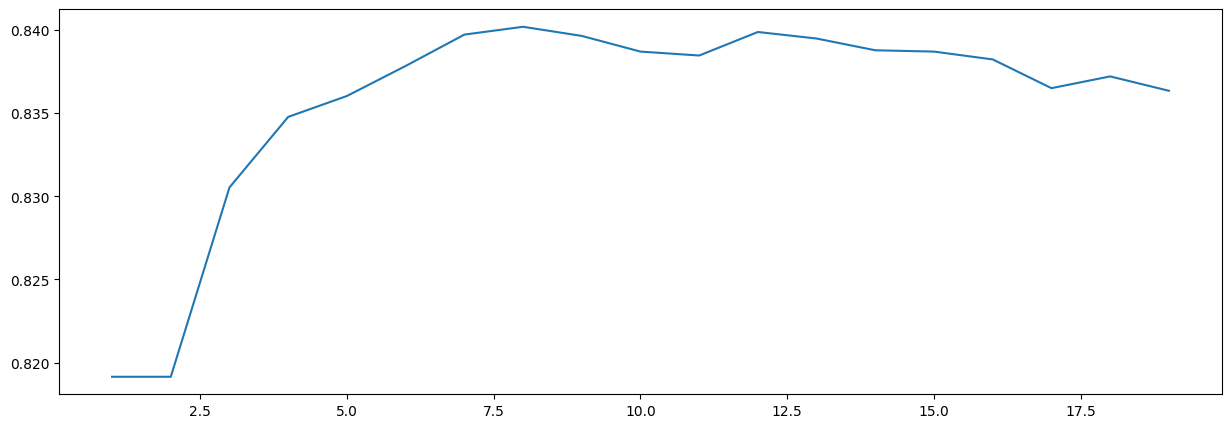

In [44]:
# Plotting the Graph to find optimum k values

plt.figure(figsize=(15,5))
plt.plot(range(1,20), cv_score)
plt.show()

Training Score of KNN : 100.0
Testing Score of KNN : 78.75
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1593
           1       0.48      0.62      0.54       407

    accuracy                           0.79      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.79      0.80      2000



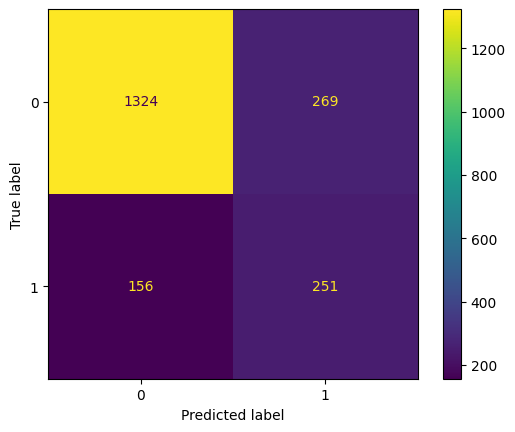

In [45]:
# Optimum K Value as 6 and Training the KNN

knn.set_params(n_neighbors=6)
knn.fit(x_train_scaled,y_train_smote)
print(f"Training Score of KNN : {round(knn.score(x_train_scaled,y_train_smote)*100,2)}")
y_pred_knn = knn.predict(x_test_scaled)
print(f"Testing Score of KNN : {round(accuracy_score(y_test,y_pred_knn)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_knn))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

Training Score of Ada Boost : 100.0
Testing Score of Ada Boost : 82.7
********** Classification Report **********
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1593
           1       0.57      0.57      0.57       407

    accuracy                           0.83      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.83      0.83      0.83      2000



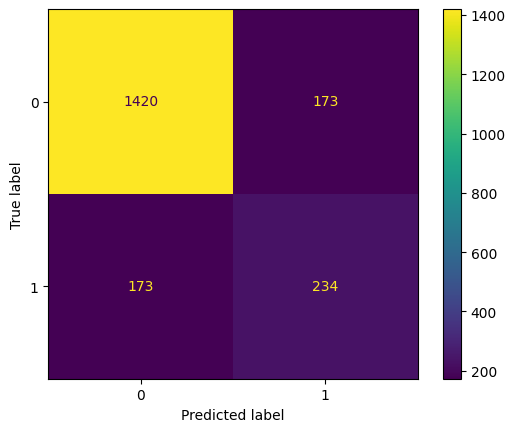

In [46]:
# On the Optimised KNN algorithm, precision and recall score are not up to the expectations and hence proceeding with the Boosting Algorithm

# Training the model - AdaBoost

boost= AdaBoostClassifier(estimator=rf,random_state=42)
boost.fit(x_train_scaled,y_train_smote)
print(f"Training Score of Ada Boost : {round(boost.score(x_train_scaled,y_train_smote)*100,2)}")
y_pred_boost = boost.predict(x_test_scaled)
print(f"Testing Score of Ada Boost : {round(accuracy_score(y_test,y_pred_boost)*100,2)}")

print("********** Classification Report **********")
print(classification_report(y_test,y_pred_boost))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred_boost)


**Variable Importance**




In [47]:
# Feature Importance

feature_importance = boost.feature_importances_
feature_importance

array([0.09865365, 0.05082384, 0.25291308, 0.06104661, 0.10761616,
       0.10805684, 0.09754044, 0.0616434 , 0.05566801, 0.03190608,
       0.02819853, 0.0120945 , 0.03383887])

In [48]:
feature_df = pd.DataFrame({'Feature':x_train_scaled.columns,'Importance':feature_importance})
feature_df.sort_values(by='Importance',ascending=False,inplace=True)
feature_df['Percentag_Importace']= round(feature_df['Importance']*100,2)
feature_df['Cumulative_Percentage'] = feature_df['Percentag_Importace'].cumsum()
feature_df

,Feature,Importance,Percentag_Importace,Cumulative_Percentage
2,Age,0.252913,25.29,25.29
5,Balance,0.108057,10.81,36.10
4,EstimatedSalary,0.107616,10.76,46.86
0,CreditScore,0.098654,9.87,56.73
6,NumOfProducts,0.097540,9.75,66.48
7,HasCrCard,0.061643,6.16,72.64
3,Tenure,0.061047,6.10,78.74
8,IsActiveMember,0.055668,5.57,84.31
1,Gender,0.050824,5.08,89.39
12,Geography_Spain,0.033839,3.38,92.77
